In [1]:
# Import modules
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

# scikit-learnのデータセット"Iris"の特徴量をmatplotlibで可視化

1. ヒストグラム
1. 3Dグラフ
1. 等高線図

In [2]:
import sklearn.datasets
iris_set = sklearn.datasets.load_iris()

print("class:{}".format(np.unique(iris_set.target)) )
pd.DataFrame(np.column_stack((iris_set.data, iris_set.target.reshape(-1,1))), columns=np.append(iris_set.feature_names,'class') )

class:[0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### 1. ヒストグラム

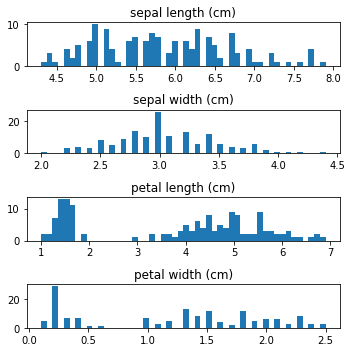

In [3]:
%matplotlib inline

fig_num = len(iris_set.feature_names)
fig = plt.figure(figsize=(5,5))
for i, name in enumerate(iris_set.feature_names):
    ax = fig.add_subplot(fig_num,1,i+1)
    ax.hist(iris_set.data[:,i], bins=50)
    ax.set_title(name)
    
fig.tight_layout()
fig.show()

### 2. 3Dグラフ

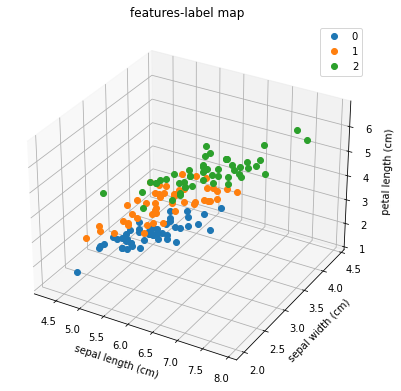

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
for i in np.unique(iris_set.target):
    mask = iris_set.target == i
    ax.plot(iris_set.data[mask,0], iris_set.data[mask,1], iris_set.data[mask,2], 'o', label=str(i))

ax.set_xlabel(iris_set.feature_names[0])
ax.set_ylabel(iris_set.feature_names[1])
ax.set_zlabel(iris_set.feature_names[2])
plt.title("features-label map")

plt.legend()
plt.show()

### 3. 等高線図

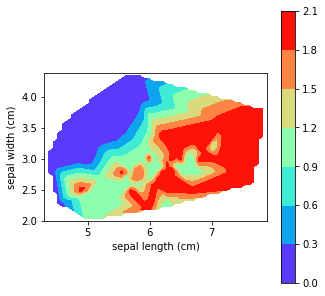

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.interpolate import griddata

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

feat_dat = iris_set.data[:,:2]
feat1_range = np.linspace(np.min(feat_dat[:,0]), np.max(feat_dat[:,0]))
feat2_range = np.linspace(np.min(feat_dat[:,1]), np.max(feat_dat[:,1]))
X, Y = np.meshgrid(feat1_range, feat2_range)
Z = griddata(feat_dat, iris_set.target, (X, Y), "linear")
sc = plt.contourf(X, Y, Z, 
                  cmap=plt.cm.rainbow, vmin=-np.nanmin(Z), vmax=np.nanmax(Z))

fig.colorbar(sc)
fig.gca().set_aspect('equal', adjustable='box')        

ax.set_xlabel(iris_set.feature_names[0])
ax.set_ylabel(iris_set.feature_names[1])
fig.show()